# Die ROC-Curve - Beurteilung binärer Classifier
### Einführungsbeispiel

Das Modell sagt: [ True  True  True False  True  True False False False False]
Tatsächlich:     [False False False False False  True  True  True  True  True]


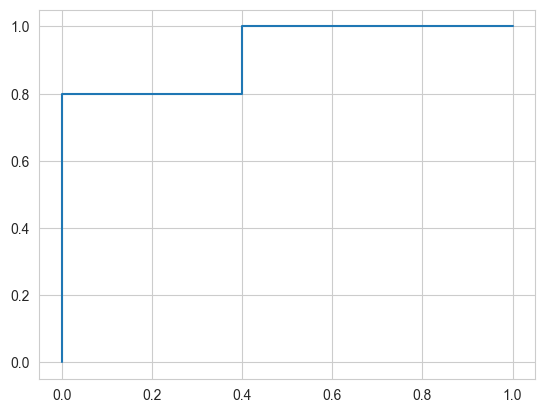

In [1]:
import numpy as np
from sklearn import metrics
#Die tatsächliche Klassenzugehörigkeit (also 0 oder 1) ist hier wiedergegeben:
y = np.array([0,0,0,0,0,1,1,1,1,1]) 
# Gegeben seien Vorhersagen eines Modells: 0.5 sei die Entscheidungsgrenze: 
scores = np.array([0.0, 0.0, 0.1, 0.55, 0.45, 0.4, 0.8, 0.8, 0.8, 1.0])
y_test_pred = scores <= 0.5
print('Das Modell sagt: ' + str(y_test_pred))
print('Tatsächlich:     ' + str(y == 1))
# ...um 0.5 herum gibt es also FP's und FN's, was mit der ROC-Curve gezeigt wird:
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

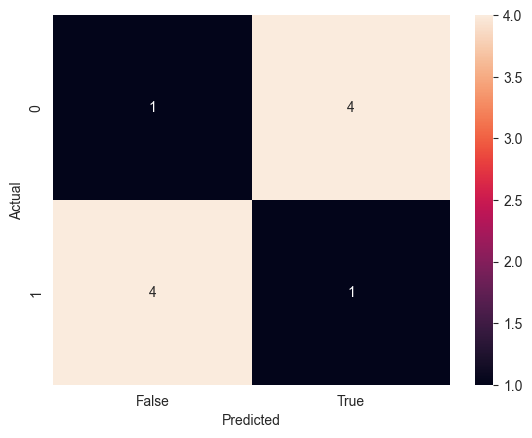

In [2]:
import pandas as pd
# Schöner in Seaborn.....
import seaborn as sn
import matplotlib.pyplot as plt
# y: tatsächlich              
conf_mat = pd.crosstab(y, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)
plt.show()

### Die ROC-Curve an einem Beispiel-Modell

In [3]:
import pandas as pd

df = pd.read_csv("data/classification.csv")

# Wenn du ein paar Spalten vorab aus den Daten entfernen
# df = df.drop("Spaltenname", axis = 1)

# Wenn du eine kategorische Variable in mehrere Spalten umwandeln
# möchtest, kannst du das mit folgendem Code tun:
# df = pd.get_dummies(df, columns = ["Spaltenname"])

df.size

891

In [4]:
from sklearn.model_selection import train_test_split

# Welche Spalten sollen zur Vorhersage verwendet werden
X = df[["age", "interest"]].values

# Oder: Die Spalte "success" soll nicht zur Vorhersage verwendet werden:
# X = df.drop("success", axis = 1).values

y = df["success"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [5]:
### Achtung!!! - Entweder Naiver-Bayes oder....
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8933333333333333


In [6]:
### Achtung!!! - ....oder Logistic Regression ausführen...
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.88


In [7]:
y_pred = model.predict(X_test)
# das liefert aber nur 0en und 1en
y_pred

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1.])

In [8]:
#predict_proba() liefert nun Wahrscheinlichkeitswerte
#[....[Wahrscheinlichkeit0,  Wahrscheinlichkeit1], ....]
model.predict_proba(X_test)

array([[1.25569216e-02, 9.87443078e-01],
       [6.10372152e-01, 3.89627848e-01],
       [9.72537407e-01, 2.74625928e-02],
       [1.98431353e-01, 8.01568647e-01],
       [6.40344982e-03, 9.93596550e-01],
       [9.75423390e-01, 2.45766105e-02],
       [8.74017890e-01, 1.25982110e-01],
       [6.83083709e-03, 9.93169163e-01],
       [7.78603824e-04, 9.99221396e-01],
       [1.70128650e-01, 8.29871350e-01],
       [4.45428389e-01, 5.54571611e-01],
       [6.47569799e-02, 9.35243020e-01],
       [9.11801218e-01, 8.81987815e-02],
       [1.23209493e-02, 9.87679051e-01],
       [3.38008368e-04, 9.99661992e-01],
       [6.72858998e-03, 9.93271410e-01],
       [8.33002435e-01, 1.66997565e-01],
       [9.77462316e-01, 2.25376844e-02],
       [8.32321260e-01, 1.67678740e-01],
       [3.76617453e-02, 9.62338255e-01],
       [9.40274679e-02, 9.05972532e-01],
       [2.87015640e-03, 9.97129844e-01],
       [8.38358976e-01, 1.61641024e-01],
       [1.95117217e-01, 8.04882783e-01],
       [7.680155

In [9]:

y_test_pred = model.predict_proba(X_test)[:, 1]

In [10]:
y_test_pred

array([0.98744308, 0.38962785, 0.02746259, 0.80156865, 0.99359655,
       0.02457661, 0.12598211, 0.99316916, 0.9992214 , 0.82987135,
       0.55457161, 0.93524302, 0.08819878, 0.98767905, 0.99966199,
       0.99327141, 0.16699757, 0.02253768, 0.16767874, 0.96233825,
       0.90597253, 0.99712984, 0.16164102, 0.80488278, 0.2319844 ,
       0.31026897, 0.75374089, 0.32063722, 0.99858116, 0.98892753,
       0.1841908 , 0.53242907, 0.22619029, 0.08665275, 0.84437089,
       0.99422989, 0.05490965, 0.5237253 , 0.33324817, 0.99445081,
       0.25714355, 0.00479772, 0.76511776, 0.97450082, 0.97668331,
       0.98152898, 0.95021048, 0.85200606, 0.40213583, 0.98577364,
       0.57209476, 0.91449536, 0.99084815, 0.0529735 , 0.9487786 ,
       0.22055361, 0.54146704, 0.99843499, 0.33834549, 0.00274228,
       0.00220513, 0.03522836, 0.87422647, 0.59771976, 0.64931721,
       0.16479268, 0.9882847 , 0.31750313, 0.98436796, 0.99410316,
       0.04219034, 0.67873692, 0.00186515, 0.95511193, 0.97049

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, pos_label=1)


In [12]:
fpr

array([0.        , 0.        , 0.        , 0.02702703, 0.02702703,
       0.05405405, 0.05405405, 0.08108108, 0.08108108, 0.10810811,
       0.10810811, 0.21621622, 0.21621622, 0.37837838, 0.37837838,
       1.        ])

In [13]:
tpr

array([0.        , 0.02631579, 0.57894737, 0.57894737, 0.60526316,
       0.60526316, 0.81578947, 0.81578947, 0.89473684, 0.89473684,
       0.94736842, 0.94736842, 0.97368421, 0.97368421, 1.        ,
       1.        ])

In [14]:
thresholds

array([1.99966199e+00, 9.99661992e-01, 9.70497390e-01, 9.62338255e-01,
       9.55111933e-01, 9.50210476e-01, 8.29871350e-01, 8.04882783e-01,
       7.53740889e-01, 6.78736922e-01, 5.97719756e-01, 5.32429070e-01,
       5.23725298e-01, 3.17503133e-01, 3.10268970e-01, 1.86515214e-03])

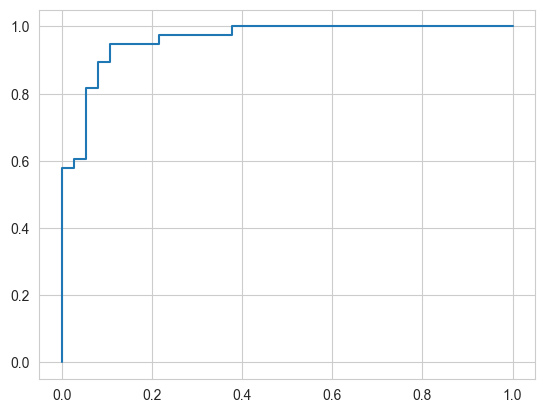

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [16]:
roc_auc_score(y_test, y_test_pred)

0.9601706970128023

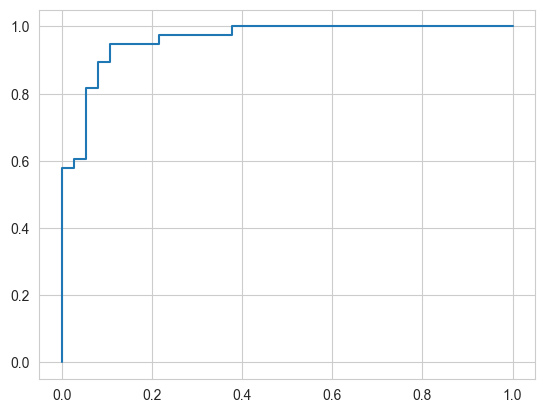

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [18]:
roc_auc_score(y_test, y_test_pred)

0.9601706970128023

In [19]:
metrics.roc_curve?

### Die Veranschaulichung der ROC-Curve mit mehr oder weniger aussagekräftigen Verteilungen von Score-Werten


In [20]:
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn import metrics
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
%matplotlib inline

n = 300
negative = np.random.normal(0, 0.1, n) #Gauss-Verteilung mit Mittelwert, Standardabweichung, Anzahl n Datenpunkte
positive = np.random.normal(0, 0.1, n) #Gauss-Verteilung mit Mittelwert, Standardabweichung, Anzahl n Datenpunkte

def hist_model(y_negativ, y_positiv):
    fig, axs = plt.subplots(1,3, figsize=(15, 5))
    fig.tight_layout(pad=5.0) #Abstand der Subplots
    #fig.suptitle('Titel')
    
    axs[0].set_title('Daten binärer Klassenzugehörigkeit')
    axs[0].set_xlim([0, 1])
    neg = negative+y_negativ
    pos = positive+y_positiv
    X = np.concatenate((neg, pos))
    y = np.concatenate(( np.zeros(n), np.ones(n) ))
    entscheidungsgrenze = (y_positiv + y_negativ) / 2
    y_pred = X >= entscheidungsgrenze
    axs[0].hist(neg, bins = (int)(n/10), color='red',  alpha = 0.5)
    axs[0].hist(pos, bins = (int)(n/10), color='blue', alpha = 0.5)
    axs[0].plot([entscheidungsgrenze,entscheidungsgrenze], [0,10], color='black')
    axs[0].text(entscheidungsgrenze, 0.44, 'Entscheidungsgrenze', color='black', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
    axs[0].text(entscheidungsgrenze, 0.39, 'des Modells', color='black', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)

    axs[0].set_xlabel("Score-Wert des Modells", 
           #family='serif', 
           #color='r', 
           weight='normal', 
           size = 16,
           labelpad = 6)
    axs[0].set_ylabel("Anzahl", 
           #family='serif', 
           #color='r', 
           weight='normal', 
           size = 16,
           labelpad = 6)
    axs[0].text(0.5, 0.9, 'Rot: negativ', color='red', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
    axs[0].text(0.5, 0.85, 'Blau: positiv', color='blue', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
    axs[0].text(0.5, 0.8, 'Violett: uneindeutig', color='purple', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)

    axs[1].set_title('ROC-Kurve')   
    axs[1].set_xlabel("P(TP)", 
           #family='serif', 
           #color='r', 
           weight='normal', 
           size = 16,
           labelpad = 6)
    axs[1].set_ylabel("P(FP)", 
           #family='serif', 
           #color='r', 
           weight='normal', 
           size = 16,
           labelpad = 6)
    fpr, tpr, thresholds = metrics.roc_curve(y, X, pos_label=1)
    axs[1].plot(fpr, tpr)
    auc = roc_auc_score(y, y_pred)
    axs[1].text(0.5, 0.5, 'AUC-Score: {auc:.3f}'.format(auc=auc), horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

    axs[2].set_title('Confusion-Matrix')
    conf_mat = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(conf_mat, annot=True, ax=axs[2]) 
    
interact(hist_model, y_negativ = widgets.FloatSlider(value=0.35,
                                               min=0,
                                               max=1.0,
                                               step=0.05),
                    y_positiv = widgets.FloatSlider(value=0.65,
                                               min=0,
                                               max=1.0,
                                               step=0.05))

interactive(children=(FloatSlider(value=0.35, description='y_negativ', max=1.0, step=0.05), FloatSlider(value=…

<function __main__.hist_model(y_negativ, y_positiv)>